### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [2]:
import pandas as pd  
heart = pd.read_csv('Heart.csv')

### 2. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [7]:

print("First 5 rows of the dataset:")
print(heart.head())

print("\nSummary of the dataset:")
print(heart.info())

print("\nDescriptive statistics of numeric columns:")
print(heart.describe())

print("\nCount of unique values for each column:")
print(heart.nunique())

categorical_vars = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal', 'AHD']
print("\nValue counts for categorical variables:")
for var in categorical_vars:
    print(f"\n{var}:\n{heart[var].value_counts()}")

print("\nMissing data check:")
print(heart.isnull().sum())


First 5 rows of the dataset:
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unn

The categorical variables are 'sex', 'chestpain', 'FBs', 'restecg', 'exang', 'slope', 'thal', and 'AHD'.

The numeric variables are 'age', 'restbp', 'chol', 'maxhr', 'oldpeak', and 'ca'.

None of the categorical variables seems to be highly imbalanced. 

There is some missing values, the 'Ca" column has 4 missing values and the 'Thal' column is missing 2 values. 

The primary target is AHD which indicates 'yes' or 'no' for Atherosclerotic Heart Disease.

Some interesting secondary variables could be risk factors for heart disease which include, age, resting blood pressure (RestBP), serum cholesterol levels (Chol), maxmimum heart rate (MaxHR), chest pain (ChestPain), and thalassemia (Thal).

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

/Users/melisa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


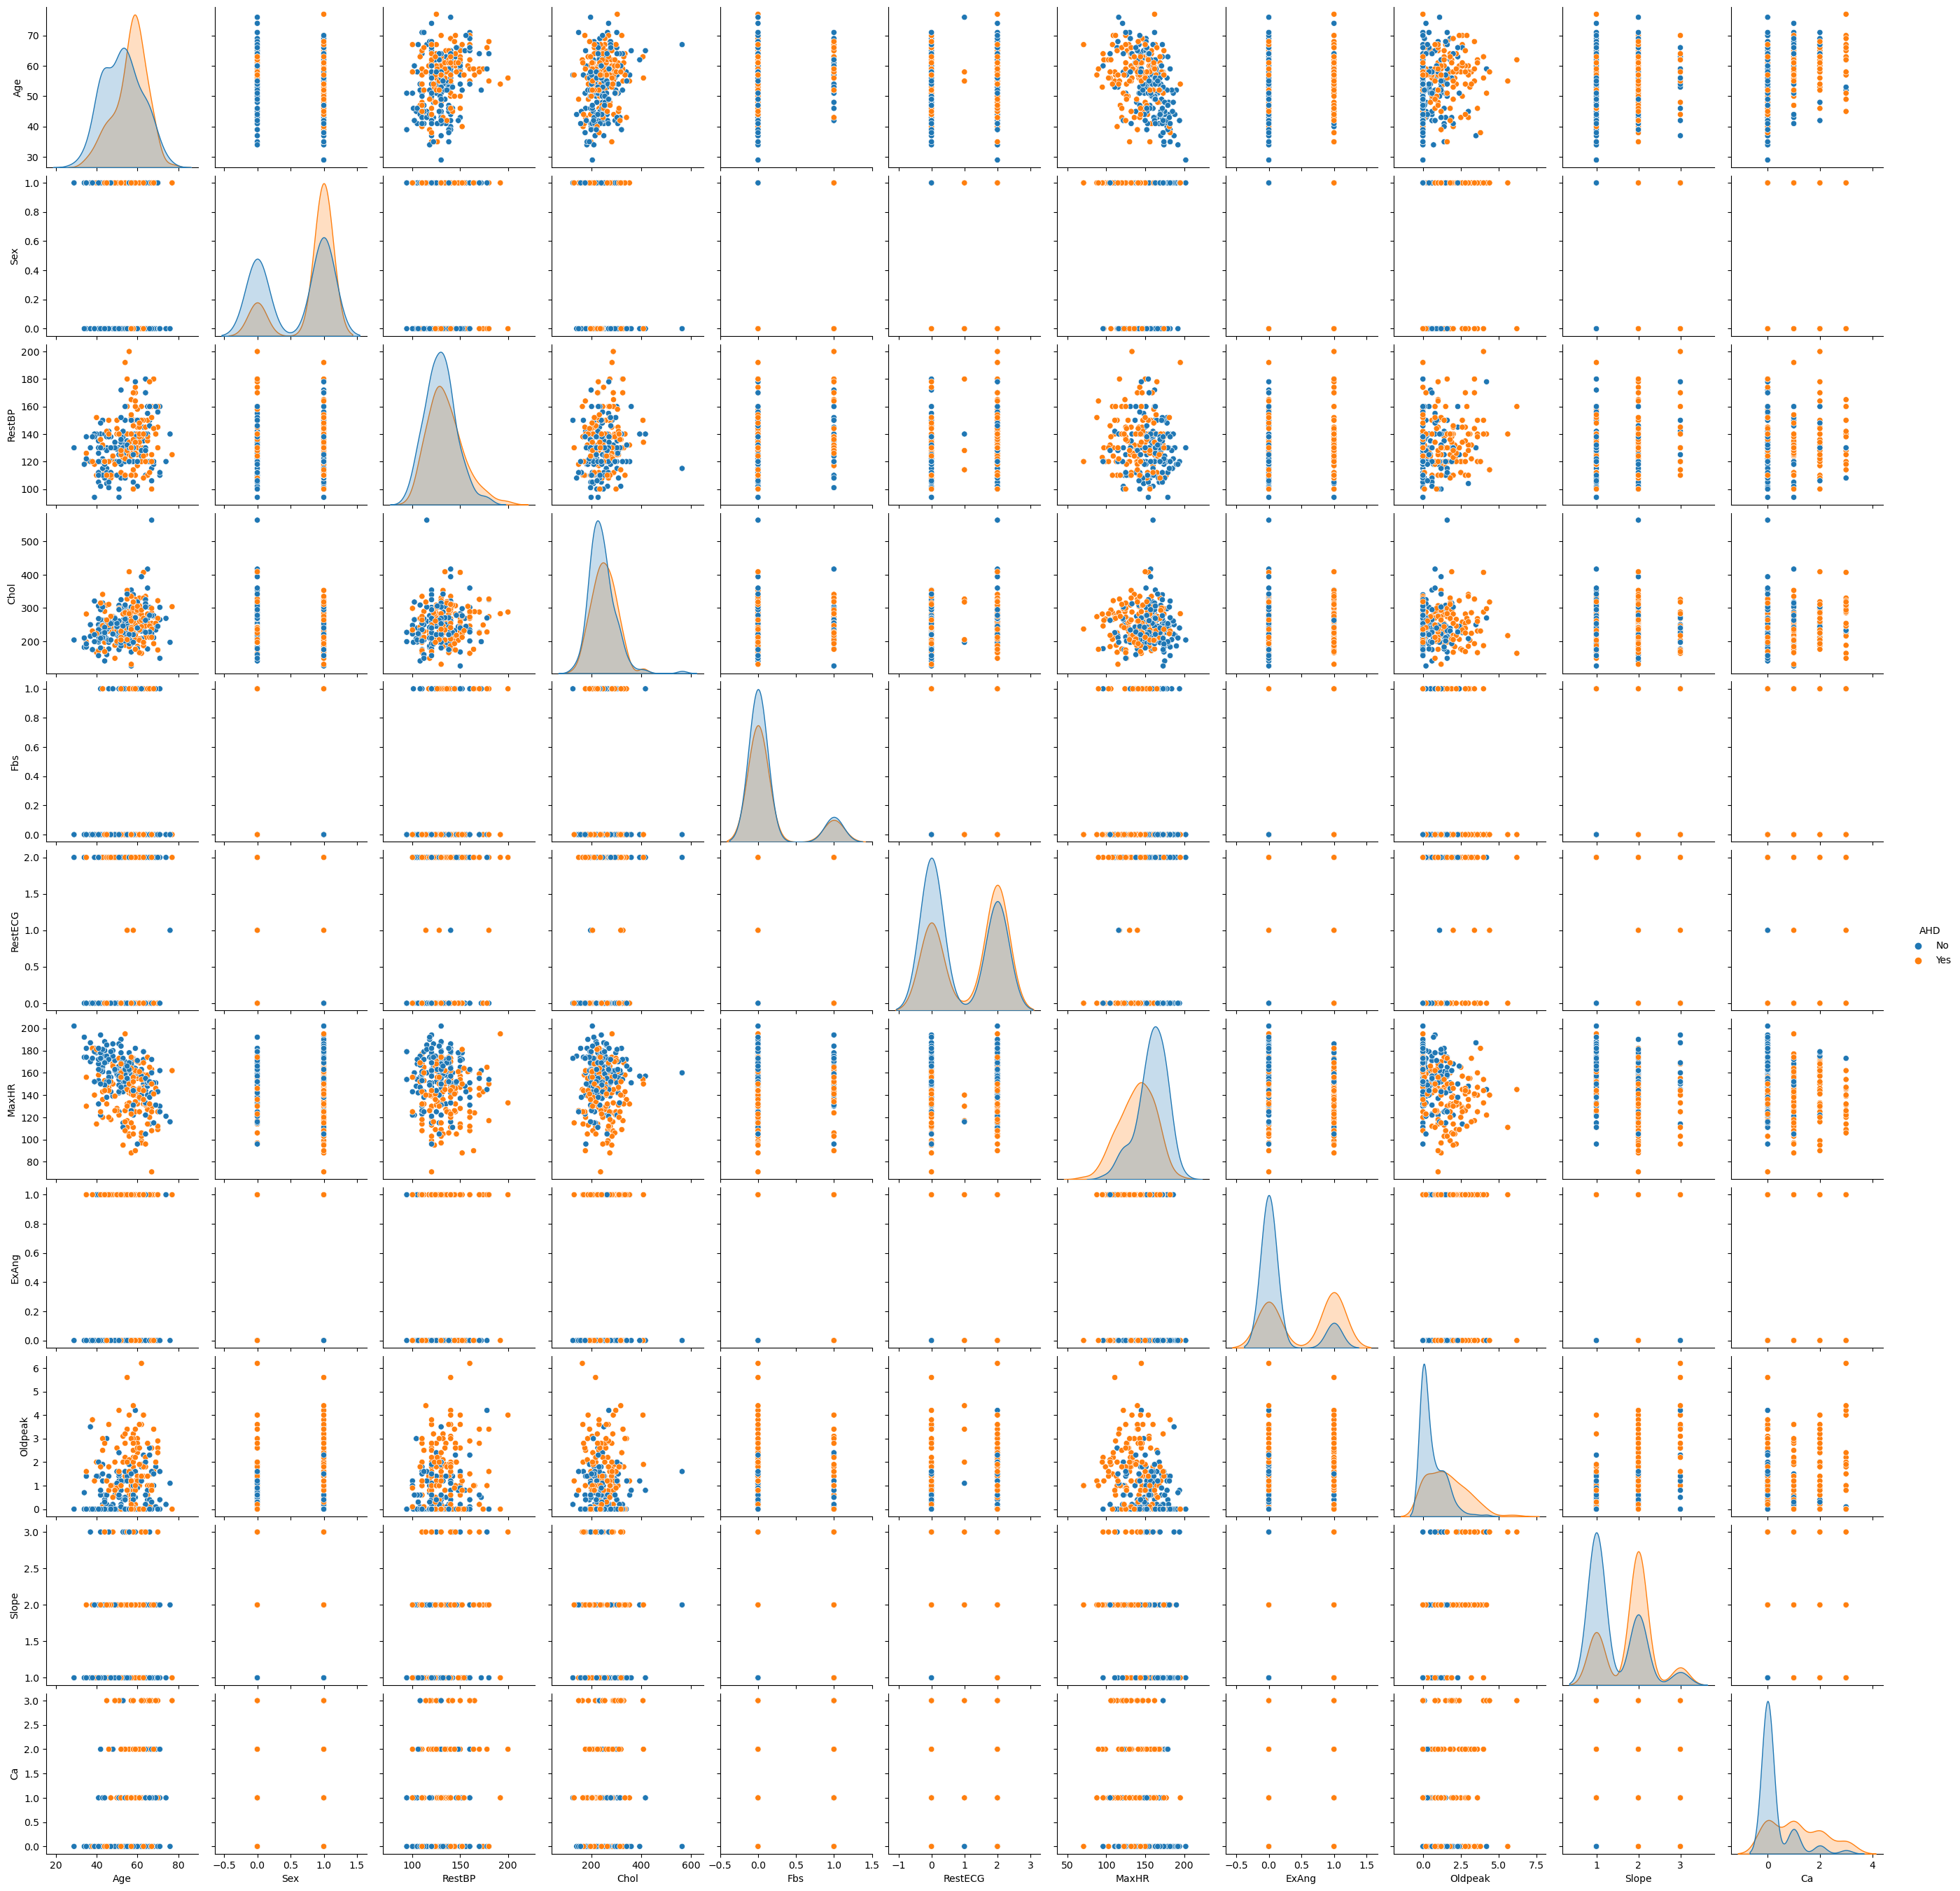

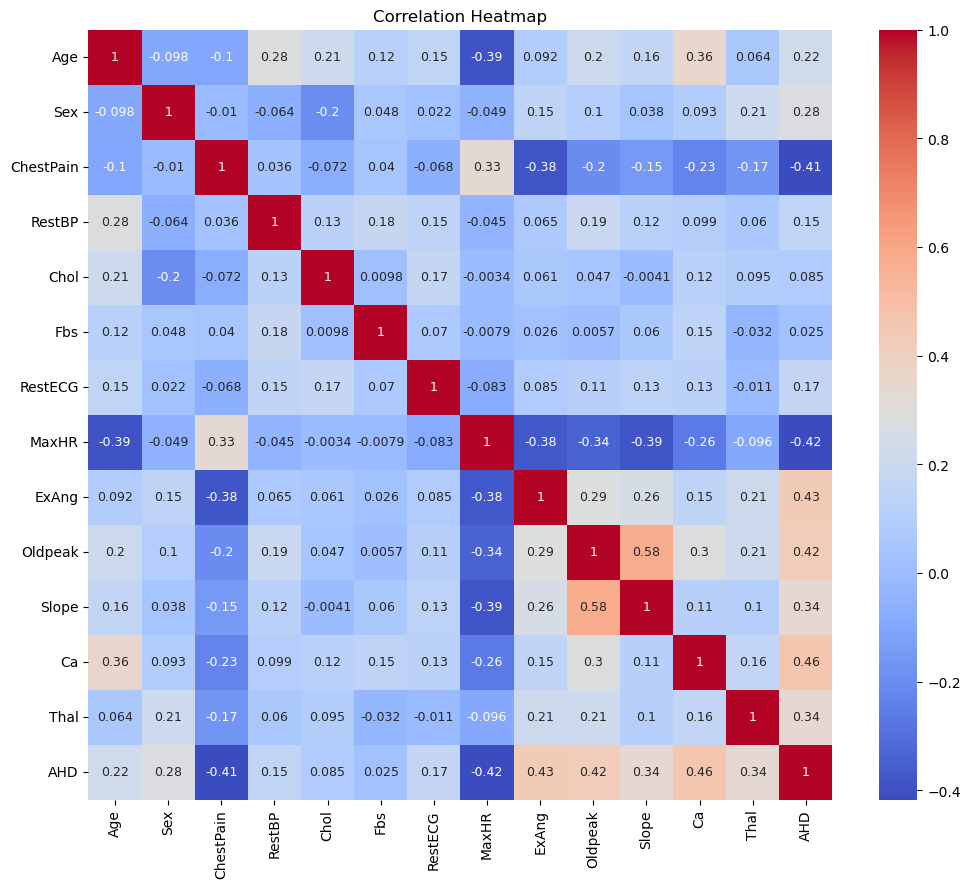

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


all_cols = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']


sns.pairplot(data=heart[all_cols], hue='AHD', diag_kind='kde')
plt.show()


categorical_cols = ['ChestPain', 'Thal', 'AHD', 'Sex', 'Fbs','RestECG','Slope', 'ExAng']
heart_encoded = heart.copy()
for col in categorical_cols:
    heart_encoded[col] = heart_encoded[col].astype('category').cat.codes


plt.figure(figsize=(12, 10))
correlation_matrix = heart_encoded[all_cols].corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 9}) 
plt.title('Correlation Heatmap')
plt.show()


### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [31]:
## I made a small example here, of how to use pd.get_dummies. Yes, you could do these steps manually. But 
## this is the slick way to do it. 

categories = [('Sex',['1','0']),
              ('ChestPain',['asymptomatic','nonanginal','nontypical','typical']),  # Added comma here
              ('Fbs',['1','0']),
              ('RestECG',['0','1','2']),
              ('ExAng',['0','1']),
              ('Slope',['1','2','3']),
              ('Thal',['normal','reversable','fixed']),
              ('AHD',['Yes','No'])]

X = pd.DataFrame(columns=['Sex','ChestPain','Fbs','RestECG','ExAng','Slope','Thal','AHD'],
                 data=[['1', 'typical', '1', '2', '0', '3', 'fixed', 'No'],
    ['1', 'asymptomatic', '0', '2', '1', '2', 'normal', 'Yes'],
    ['1', 'asymptomatic', '0', '2', '1', '2', 'reversable', 'Yes'],
    ['1', 'nonanginal', '0', '0', '0', '3', 'normal', 'No'],
    ['0', 'nontypical', '0', '2', '0', '1', 'normal', 'No'],
    ['1', 'nontypical', '0', '0', '0', '1', 'normal', 'No'],
    ['0', 'asymptomatic', '0', '2', '0', '3', 'normal', 'Yes'],
    ['0', 'asymptomatic', '0', '0', '1', '1', 'normal', 'No'],
    ['1', 'asymptomatic', '0', '2', '0', '2', 'reversable', 'Yes'],
    ['1', 'asymptomatic', '0', '2', '1', '3', 'reversable', 'Yes']])
X_dummy = pd.get_dummies(X)
display(X, X_dummy) 


 #This is similar to head, but shows everything.  

#encoder = {'Cat':1,'Dog':2,'Parrot':3,'Whale':4}
#X_encoder = X['Type'].map(encoder)
##display(X)

,Sex,ChestPain,Fbs,RestECG,ExAng,Slope,Thal,AHD
0,1,typical,1,2,0,3,fixed,No
1,1,asymptomatic,0,2,1,2,normal,Yes
2,1,asymptomatic,0,2,1,2,reversable,Yes
3,1,nonanginal,0,0,0,3,normal,No
4,0,nontypical,0,2,0,1,normal,No
5,1,nontypical,0,0,0,1,normal,No
6,0,asymptomatic,0,2,0,3,normal,Yes
7,0,asymptomatic,0,0,1,1,normal,No
8,1,asymptomatic,0,2,0,2,reversable,Yes
9,1,asymptomatic,0,2,1,3,reversable,Yes


,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Fbs_0,Fbs_1,RestECG_0,RestECG_2,ExAng_0,ExAng_1,Slope_1,Slope_2,Slope_3,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,False,True,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,True,False
1,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True
2,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True
3,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False,True,False
4,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
5,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False
6,True,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False
8,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
9,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True


### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [33]:
from sklearn.model_selection import train_test_split, KFold

y = X_dummy['AHD_Yes']
X_features = X_dummy.drop(columns=['AHD_No', 'AHD_Yes'])

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

display(X, X_dummy, X_train, X_test, y_train, y_test)



,Sex,ChestPain,Fbs,RestECG,ExAng,Slope,Thal,AHD
0,1,typical,1,2,0,3,fixed,No
1,1,asymptomatic,0,2,1,2,normal,Yes
2,1,asymptomatic,0,2,1,2,reversable,Yes
3,1,nonanginal,0,0,0,3,normal,No
4,0,nontypical,0,2,0,1,normal,No
5,1,nontypical,0,0,0,1,normal,No
6,0,asymptomatic,0,2,0,3,normal,Yes
7,0,asymptomatic,0,0,1,1,normal,No
8,1,asymptomatic,0,2,0,2,reversable,Yes
9,1,asymptomatic,0,2,1,3,reversable,Yes


,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Fbs_0,Fbs_1,RestECG_0,RestECG_2,ExAng_0,ExAng_1,Slope_1,Slope_2,Slope_3,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,False,True,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,True,False
1,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True
2,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True
3,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False,True,False
4,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
5,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False
6,True,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False
8,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
9,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True


,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Fbs_0,Fbs_1,RestECG_0,RestECG_2,ExAng_0,ExAng_1,Slope_1,Slope_2,Slope_3,Thal_fixed,Thal_normal,Thal_reversable
0,False,True,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False
7,True,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True
9,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True
4,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False
3,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False
6,True,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False


,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Fbs_0,Fbs_1,RestECG_0,RestECG_2,ExAng_0,ExAng_1,Slope_1,Slope_2,Slope_3,Thal_fixed,Thal_normal,Thal_reversable
8,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False
5,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False


0    False
7    False
2     True
9     True
4    False
3    False
6     True
Name: AHD_Yes, dtype: bool

8     True
1     True
5    False
Name: AHD_Yes, dtype: bool

### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

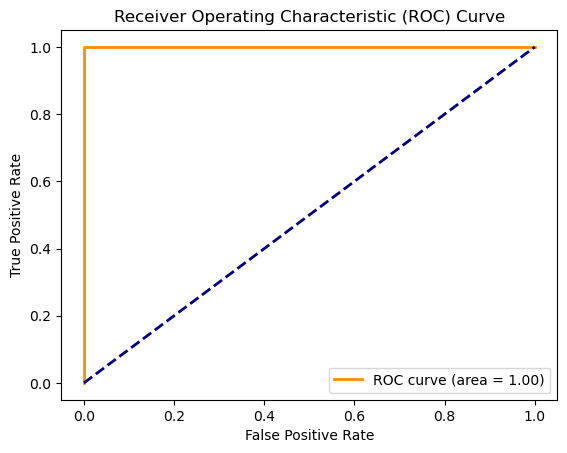

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
ROC AUC Score: 1.0


In [42]:

logreg.fit(X_train, y_train)


y_pred_proba = logreg.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_val = confusion_matrix(y_test, y_pred)
roc_auc_val = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_val)
print("ROC AUC Score:", roc_auc_val)


### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

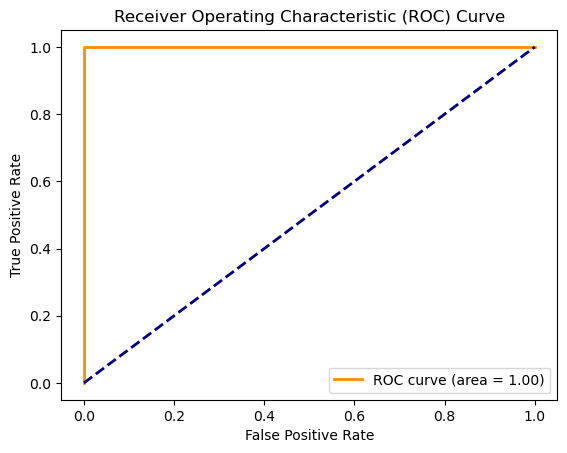

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
ROC AUC Score: 1.0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)


y_pred_proba = logreg.predict_proba(X_test)[:, 1]


y_pred = logreg.predict(X_test)


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_val = confusion_matrix(y_test, y_pred)
roc_auc_val = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_val)
print("ROC AUC Score:", roc_auc_val)


### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   

I'm pretty sure I did the models wrong so I'm not sure I understand its features and criterion.